# 02_1.EDA(수치형 자료 분석)

## 1.package 설치

In [ ]:
# 그래프에서 한글 폰트 인식하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#  *** 세션 다시 시작

In [1]:
# 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
import seaborn as sns # 시각화

# 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환

In [2]:
# 테마 설정
sns.set_theme(style = "darkgrid")

# 한글 인식
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # -인식

## 2.데이터 불러오기

### 2.1 데이터 프레임으로 저장
- 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [3]:
url = "https://raw.githubusercontent.com/leecho-bigdata/statistics-python/main/01_1.EDA.csv"
eda_df = pd.read_csv(url, encoding="cp949")
eda_df.head(10)

,id,성별,분반,학년,몸무게,출석,중간,기말
0,1,남자,1,1,40,100,87,80
1,2,여자,2,2,50,100,83,60
2,3,남자,1,3,56,100,84,60
3,4,여자,2,4,51,100,73,60
4,5,남자,1,1,55,100,68,60
5,6,남자,2,2,61,100,77,50
6,7,여자,1,3,69,100,40,80
7,8,여자,2,2,44,100,73,30
8,9,여자,1,2,66,80,64,40
9,10,남자,2,2,60,100,66,40


### 2.2 자료구조 살펴보기

In [4]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      102 non-null    int64 
 1   성별      102 non-null    object
 2   분반      102 non-null    int64 
 3   학년      102 non-null    int64 
 4   몸무게     102 non-null    int64 
 5   출석      102 non-null    int64 
 6   중간      102 non-null    int64 
 7   기말      102 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 6.5+ KB


In [5]:
eda_df.shape

(102, 8)

In [6]:
eda_df.dtypes

id      int64
성별     object
분반      int64
학년      int64
몸무게     int64
출석      int64
중간      int64
기말      int64
dtype: object

### 2.3 범주형 변수 처리
- 가변수 처리시 문자로 처리를 해야 변수명 구분이 쉬움

In [7]:
eda_df['성별'] = eda_df['성별'].replace ([1,2], ['남자','여자'])
eda_df['분반'].replace({1:'A반', 2:'B반'}, inplace=True)
eda_df['학년'].replace({1:'1학년', 2:'2학년', 3:'3학년', 4:'4학년'}, inplace=True)

eda_df.head()

,id,성별,분반,학년,몸무게,출석,중간,기말
0,1,남자,A반,1학년,40,100,87,80
1,2,여자,B반,2학년,50,100,83,60
2,3,남자,A반,3학년,56,100,84,60
3,4,여자,B반,4학년,51,100,73,60
4,5,남자,A반,1학년,55,100,68,60


In [8]:
eda_df.dtypes

id      int64
성별     object
분반     object
학년     object
몸무게     int64
출석      int64
중간      int64
기말      int64
dtype: object

In [9]:
# datatype을 categroy로 변경
eda_df['성별'] = eda_df['성별'].astype('category')
eda_df['분반'] = eda_df['분반'].astype('category')
eda_df['학년'] = eda_df['학년'].astype('category')

## 3.수치형 변수(1개) (one numerical)

### 3.1 기술통계

In [10]:
# 기술통계 사용 함수
print(eda_df.몸무게.count())
print(eda_df.몸무게.mean())
print(eda_df.몸무게.std())
print(eda_df.몸무게.min())
print(eda_df.몸무게.quantile(0.25))
print(eda_df.몸무게.quantile(0.50))
print(eda_df.몸무게.quantile(0.75))
print(eda_df.몸무게.max())
print(eda_df.몸무게.median())
print(eda_df.몸무게.mode().values[0])
print(eda_df.몸무게.skew())
print(eda_df.몸무게.kurtosis())

102
57.72549019607843
9.74339772678295
40
52.0
57.0
61.0
120
57.0
56
2.859762999904391
16.388423380051602


In [11]:
# 필요한 변수 1개 선택
# describe() 사용
eda_df.몸무게.describe()

count    102.000000
mean      57.725490
std        9.743398
min       40.000000
25%       52.000000
50%       57.000000
75%       61.000000
max      120.000000
Name: 몸무게, dtype: float64

In [12]:
# table로 저장
몸무게_df = pd.DataFrame(eda_df.몸무게.describe()).T
몸무게_df

,count,mean,std,min,25%,50%,75%,max
몸무게,102.0,57.72549,9.743398,40.0,52.0,57.0,61.0,120.0


In [13]:
# 필요한 통계수치 추가
몸무게_df["skew"] = eda_df.몸무게.skew()
몸무게_df["kurtosis"] = eda_df.몸무게.kurtosis()
몸무게_df

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
몸무게,102.0,57.72549,9.743398,40.0,52.0,57.0,61.0,120.0,2.859763,16.388423


In [14]:
# agg 이용해서 필요한 항목만 추출
eda_df.agg({"몸무게": ["count", "mean", "std", "min", "max", "median", "skew", "kurtosis"]}).T

,count,mean,std,min,max,median,skew,kurtosis
몸무게,102.0,57.72549,9.743398,40.0,120.0,57.0,2.859763,16.388423


### 3.2 그래프 그리기
- histogram, boxplot

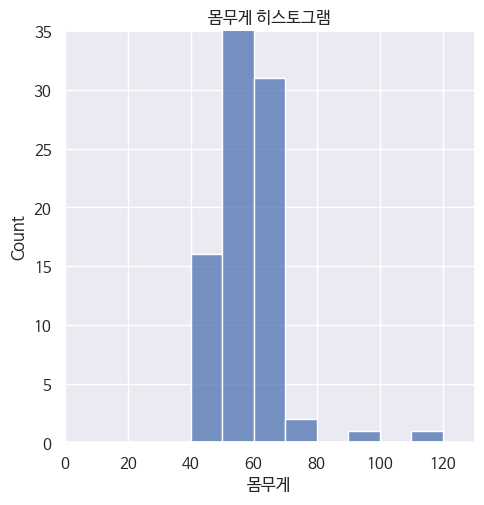

In [15]:
# histplot
g = sns.displot(data = eda_df,
                x = "몸무게",
                binwidth = 10,
                kind = "hist")
g.set(title = "몸무게 히스토그램",
      xlim = (0, 130),
      ylim = (0, 35))
plt.show()

## 4.이상치 제거

### 4.1 이상치 확인

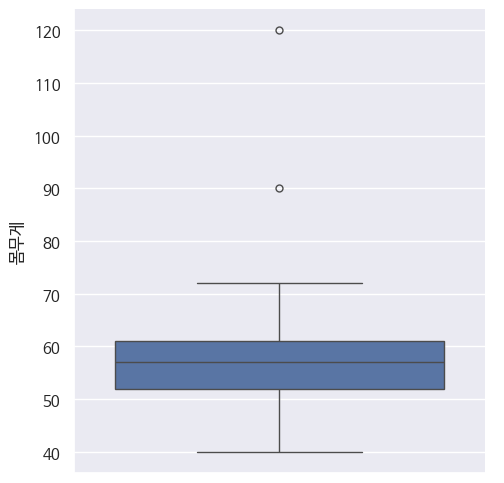

In [16]:
sns.catplot(y = "몸무게",
                kind = "box",
                data = eda_df)
plt.show()

In [17]:
filter = (eda_df["몸무게"] >= 80)
eda_df.loc[filter]

,id,성별,분반,학년,몸무게,출석,중간,기말
100,101,남자,B반,2학년,90,90,54,10
101,102,여자,A반,2학년,120,100,49,40


### 4.2 이상치 제거

In [18]:
eda_df.drop(eda_df[filter].index, inplace = True)

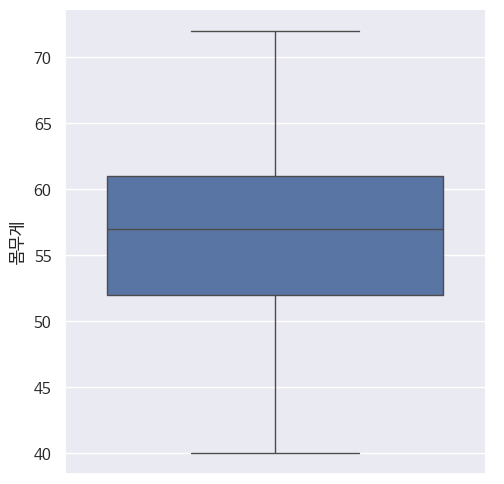

In [19]:
sns.catplot(y = "몸무게",
                kind = "box",
                data = eda_df)
plt.show()

## 5.수치형 변수를 범주형으로 변환
- 예제: 50세
- [ : <= , >=
- ( : < , >
- right = False: 45 <= x < 50 (~미만) [50, 55)
- right = True(default): 45 < x <= 50 (~이하) (45, 50]

### 5.1 범위 확인

In [20]:
pd.cut(x = eda_df['몸무게'], bins = 7) \
       .value_counts()

(53.714, 58.286]    28
(58.286, 62.857]    23
(49.143, 53.714]    16
(44.571, 49.143]    13
(62.857, 67.429]     9
(67.429, 72.0]       8
(39.968, 44.571]     3
Name: 몸무게, dtype: int64

### 5.2 범주형 변환후 저장

In [21]:
bins = [0, 45, 50, 55, 60, 65, 70, 100]
eda_df['몸무게_bin'] = pd.cut(x = eda_df['몸무게'],
                            bins = bins,
                            right = False)
eda_df.head(10)

,id,성별,분반,학년,몸무게,출석,중간,기말,몸무게_bin
0,1,남자,A반,1학년,40,100,87,80,"[0, 45)"
1,2,여자,B반,2학년,50,100,83,60,"[50, 55)"
2,3,남자,A반,3학년,56,100,84,60,"[55, 60)"
3,4,여자,B반,4학년,51,100,73,60,"[50, 55)"
4,5,남자,A반,1학년,55,100,68,60,"[55, 60)"
5,6,남자,B반,2학년,61,100,77,50,"[60, 65)"
6,7,여자,A반,3학년,69,100,40,80,"[65, 70)"
7,8,여자,B반,2학년,44,100,73,30,"[0, 45)"
8,9,여자,A반,2학년,66,80,64,40,"[65, 70)"
9,10,남자,B반,2학년,60,100,66,40,"[60, 65)"


In [22]:
bins = [0, 45, 50, 55, 60, 65, 70, 100]
label = ["~45미만", "45~50미만", "50~55미만", "55~60미만",
         "60~65미만","65~70미만", "70이상~"]
eda_df['몸무게_c'] = pd.cut(x = eda_df['몸무게'],
                            bins = bins,
                            labels = label,
                            right = False)
eda_df.head(10)

,id,성별,분반,학년,몸무게,출석,중간,기말,몸무게_bin,몸무게_c
0,1,남자,A반,1학년,40,100,87,80,"[0, 45)",~45미만
1,2,여자,B반,2학년,50,100,83,60,"[50, 55)",50~55미만
2,3,남자,A반,3학년,56,100,84,60,"[55, 60)",55~60미만
3,4,여자,B반,4학년,51,100,73,60,"[50, 55)",50~55미만
4,5,남자,A반,1학년,55,100,68,60,"[55, 60)",55~60미만
5,6,남자,B반,2학년,61,100,77,50,"[60, 65)",60~65미만
6,7,여자,A반,3학년,69,100,40,80,"[65, 70)",65~70미만
7,8,여자,B반,2학년,44,100,73,30,"[0, 45)",~45미만
8,9,여자,A반,2학년,66,80,64,40,"[65, 70)",65~70미만
9,10,남자,B반,2학년,60,100,66,40,"[60, 65)",60~65미만


### 5.3 그래프 그리기

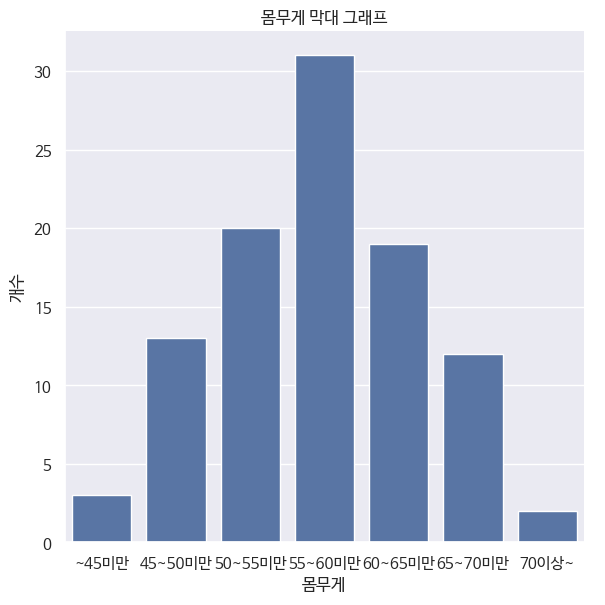

In [23]:
# 범주형 변수(막대그래프)
g = sns.catplot(data = eda_df,
                height = 6,
                x = "몸무게_c",
                kind = "count")
g.set(title = "몸무게 막대 그래프",
      xlabel = "몸무게",
      ylabel = "개수")
plt.show()

## 6.수치형 1개 + 범주형 1개

### 6.1 기술통계(그룹별)

In [24]:
# 그룹별 분석
eda_df.groupby('성별')["몸무게"].mean().T.round(2)

성별
남자    57.04
여자    56.49
Name: 몸무게, dtype: float64

In [25]:
eda_df.groupby('성별')["몸무게"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
성별,,,,,,,,
남자,53.0,57.04,6.58,40.0,53.0,57.0,61.0,71.0
여자,47.0,56.49,7.10,44.0,51.0,57.0,60.5,72.0


In [26]:
eda_df.groupby('성별') \
    .agg({"몸무게": ["count", "mean", "std", "min", "max", "median", "skew"]}) \
    .round(2) # groupby에서는 kurtosis 지원x

몸무게                                  
   count   mean   std min max median  skew
성별                                        
남자    53  57.04  6.58  40  71   57.0 -0.31
여자    47  56.49  7.10  44  72   57.0  0.29

### 6.2 그래프 그리기

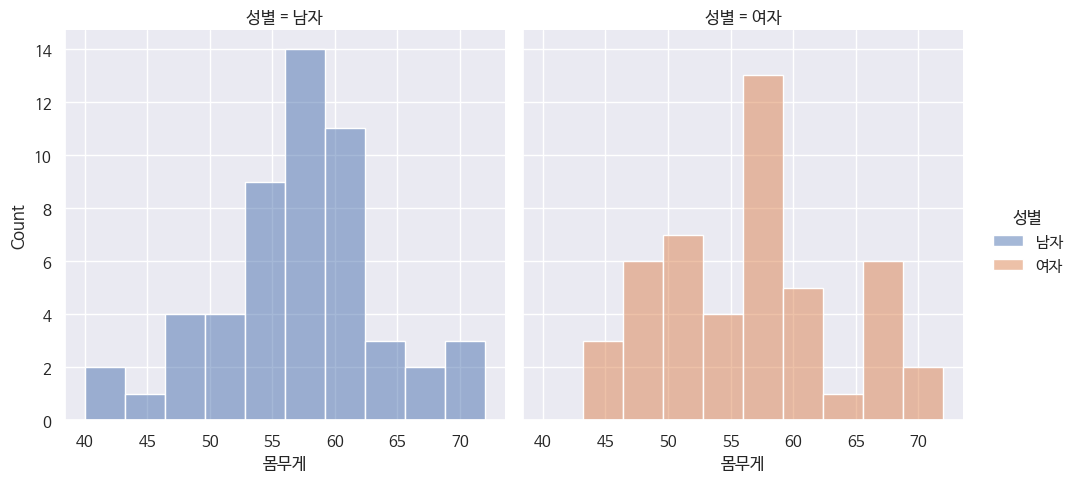

In [27]:
# 범주형 변수로 구분
sns.displot(data = eda_df,
            x = "몸무게",
            bins = 10,
            hue = "성별",
            col ="성별",
            kind = "hist")
plt.show()

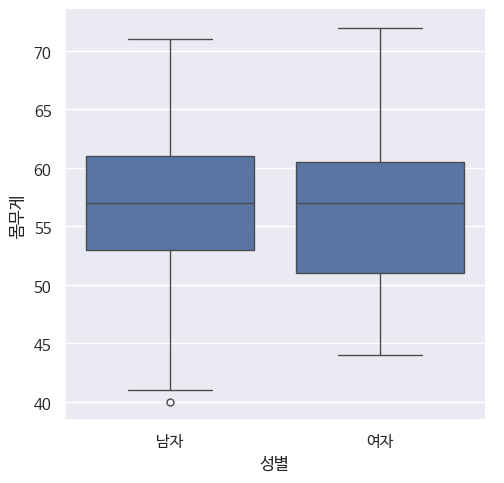

In [28]:
sns.catplot(data = eda_df,
            x = "성별",
            y = "몸무게",
            kind = "box")
plt.show()

## 7.다중 수치형 변수(multi numerical variables)

### 7.1 다중 수치형 변수 기술통계

In [29]:
# pd.describe 이용: 수치형 자료만 분석
eda_df.describe()

,id,몸무게,출석,중간,기말
count,100.000000,100.00000,100.000000,100.000000,100.000000
mean,50.500000,56.78000,95.400000,55.710000,36.500000
std,29.011492,6.80104,10.290723,19.692738,26.982037
min,1.000000,40.00000,60.000000,5.000000,10.000000
25%,25.750000,52.00000,100.000000,44.000000,10.000000
50%,50.500000,57.00000,100.000000,58.000000,30.000000
75%,75.250000,61.00000,100.000000,71.000000,56.250000
max,100.000000,72.00000,100.000000,92.000000,100.000000


In [30]:
# 범주형 변수까지 분석
eda_df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,100.0,NaN,NaN,NaN,50.5,29.011492,1.0,25.75,50.5,75.25,100.0
성별,100,2,남자,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
분반,100,2,A반,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
학년,100,4,2학년,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
몸무게,100.0,NaN,NaN,NaN,56.78,6.80104,40.0,52.0,57.0,61.0,72.0
출석,100.0,NaN,NaN,NaN,95.4,10.290723,60.0,100.0,100.0,100.0,100.0
중간,100.0,NaN,NaN,NaN,55.71,19.692738,5.0,44.0,58.0,71.0,92.0
기말,100.0,NaN,NaN,NaN,36.5,26.982037,10.0,10.0,30.0,56.25,100.0
몸무게_bin,100,7,"[55, 60)",31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
몸무게_c,100,7,55~60미만,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# 필요한 변수만 선택
eda_df.columns

Index(['id', '성별', '분반', '학년', '몸무게', '출석', '중간', '기말', '몸무게_bin', '몸무게_c'], dtype='object')

In [32]:
num_feature = ['몸무게', '출석', '중간', '기말']
eda_df[num_feature].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
몸무게,100.0,56.78,6.80,40.0,52.0,57.0,61.00,72.0
출석,100.0,95.40,10.29,60.0,100.0,100.0,100.00,100.0
중간,100.0,55.71,19.69,5.0,44.0,58.0,71.00,92.0
기말,100.0,36.50,26.98,10.0,10.0,30.0,56.25,100.0


In [33]:
# agg 이용해서 필요한 항목만 추출
eda_df[num_feature].agg(["count", "mean", "std", "min", "max", "median", "skew", "kurtosis"]).T.round(3)

,count,mean,std,min,max,median,skew,kurtosis
몸무게,100.0,56.78,6.801,40.0,72.0,57.0,-0.004,-0.290
출석,100.0,95.40,10.291,60.0,100.0,100.0,-2.209,4.052
중간,100.0,55.71,19.693,5.0,92.0,58.0,-0.392,-0.238
기말,100.0,36.50,26.982,10.0,100.0,30.0,0.817,-0.328


### 7.2 그룹별 기술통계

In [34]:
# 그룹별 분석
eda_df.groupby('성별')[num_feature].mean().T.round(2)

성별,남자,여자
몸무게,57.04,56.49
출석,96.23,94.47
중간,53.17,58.57
기말,35.94,37.13


In [35]:
eda_df.groupby('성별')[num_feature].describe().round(2)

몸무게                                               출석         ...    중간  \
   count   mean   std   min   25%   50%   75%   max count   mean  ...   75%   
성별                                                                ...         
남자  53.0  57.04  6.58  40.0  53.0  57.0  61.0  71.0  53.0  96.23  ...  67.0   
여자  47.0  56.49  7.10  44.0  51.0  57.0  60.5  72.0  47.0  94.47  ...  73.0   

            기말                                               
     max count   mean    std   min   25%   50%   75%    max  
성별                                                           
남자  87.0  53.0  35.94  26.80  10.0  10.0  30.0  50.0  100.0  
여자  92.0  47.0  37.13  27.46  10.0  10.0  30.0  60.0  100.0  

[2 rows x 32 columns]

In [36]:
eda_df.groupby('성별')[num_feature].agg(["count", "mean", "std", "min", "max", "median", "skew"]).round(3)

몸무게                                        출석                 ...  중간  \
   count    mean    std min max median  skew count    mean    std  ... max   
성별                                                                 ...       
남자    53  57.038  6.581  40  71   57.0 -0.31    53  96.226   8.82  ...  87   
여자    47  56.489  7.101  44  72   57.0  0.29    47  94.468  11.76  ...  92   

                    기말                                         
   median   skew count    mean     std min  max median   skew  
성별                                                             
남자   53.0 -0.465    53  35.943  26.802  10  100   30.0  0.837  
여자   62.0 -0.381    47  37.128  27.460  10  100   30.0  0.820  

[2 rows x 28 columns]

In [37]:
for num in num_feature:
    print("----", num, "----")
    results = eda_df.groupby('성별')[num].describe().round(2)
    print(results, "\n")

---- 몸무게 ----
    count   mean   std   min   25%   50%   75%   max
성별                                                  
남자   53.0  57.04  6.58  40.0  53.0  57.0  61.0  71.0
여자   47.0  56.49  7.10  44.0  51.0  57.0  60.5  72.0 

---- 출석 ----
    count   mean    std   min    25%    50%    75%    max
성별                                                       
남자   53.0  96.23   8.82  60.0  100.0  100.0  100.0  100.0
여자   47.0  94.47  11.76  60.0  100.0  100.0  100.0  100.0 

---- 중간 ----
    count   mean    std   min   25%   50%   75%   max
성별                                                   
남자   53.0  53.17  19.31   5.0  45.0  53.0  67.0  87.0
여자   47.0  58.57  19.93  10.0  43.5  62.0  73.0  92.0 

---- 기말 ----
    count   mean    std   min   25%   50%   75%    max
성별                                                    
남자   53.0  35.94  26.80  10.0  10.0  30.0  50.0  100.0
여자   47.0  37.13  27.46  10.0  10.0  30.0  60.0  100.0 



### 7.3 그래프 그리기

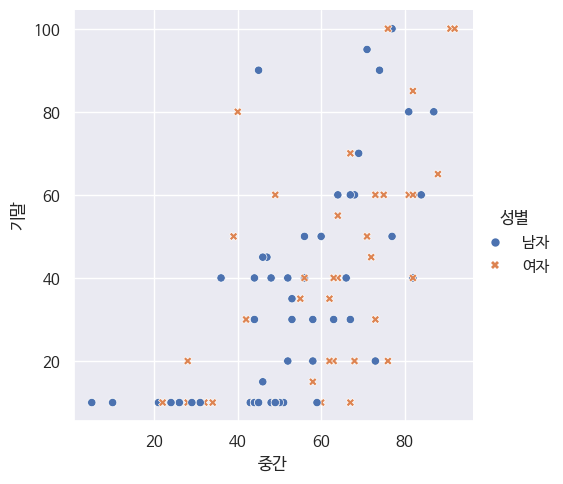

In [38]:
# 그룹별
sns.relplot(data = eda_df,
            x = "중간",
            y = "기말",
            hue = "성별",
            style = "성별")
plt.show()

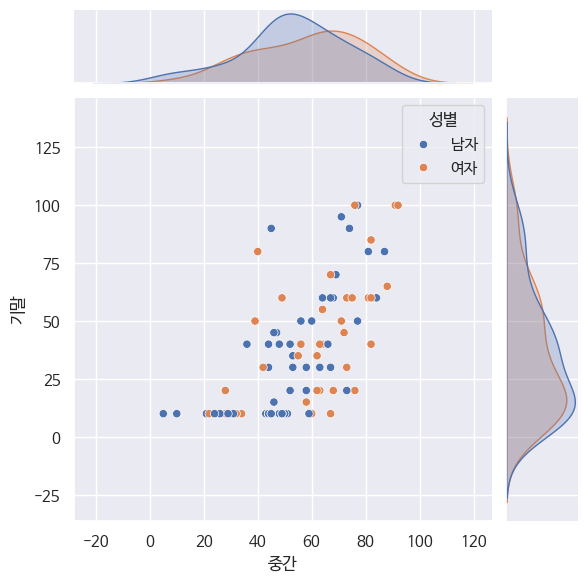

In [39]:
sns.jointplot(data = eda_df,
              x = "중간",
              y = "기말",
              hue = "성별")
plt.show()

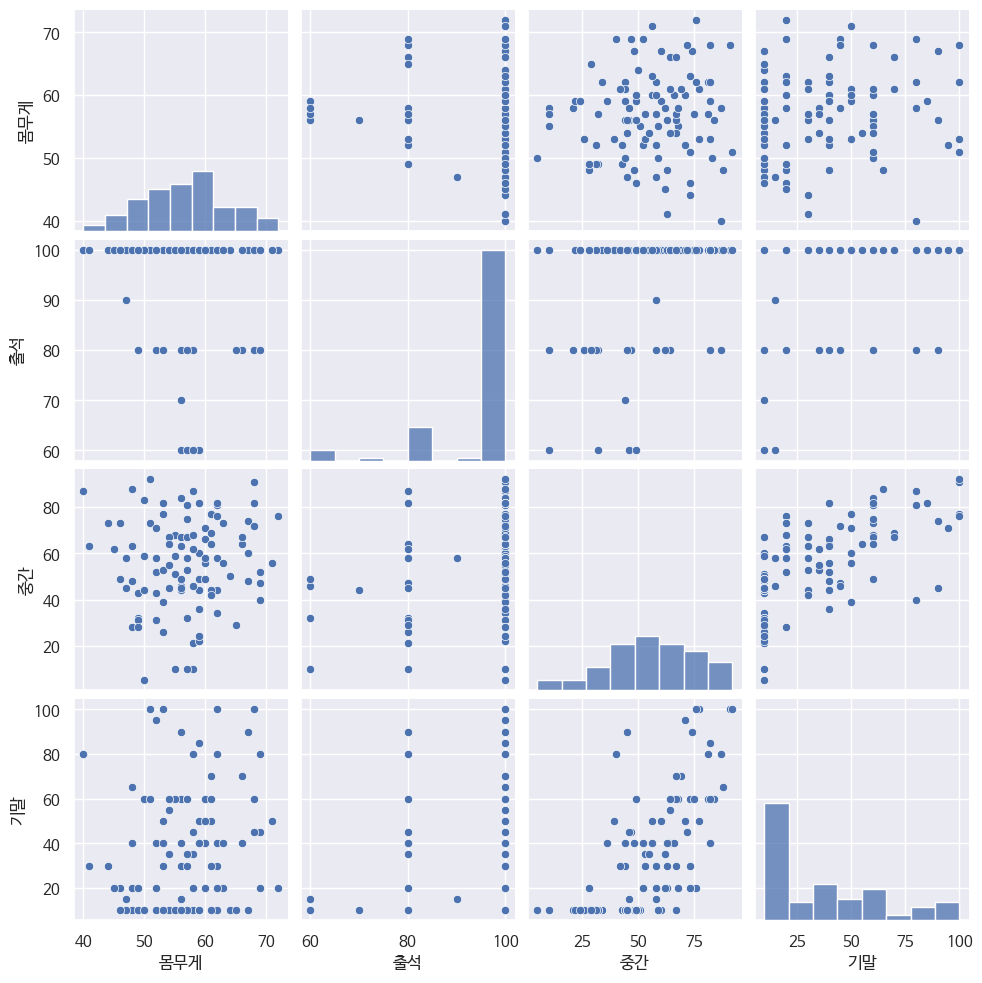

In [40]:
sns.pairplot(vars = num_feature,
             data = eda_df)
plt.show()

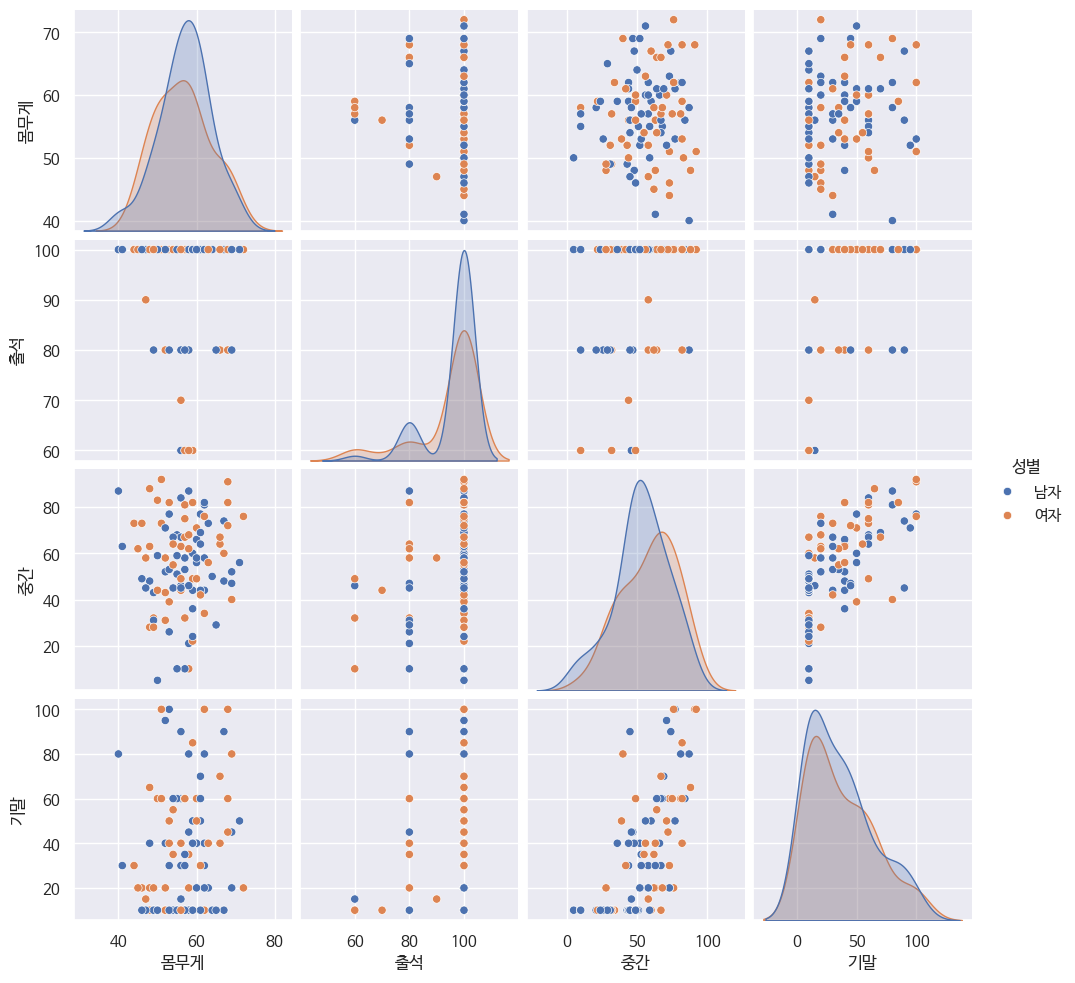

In [41]:
sns.pairplot(vars = num_feature,
             hue = "성별",
             data = eda_df)
plt.show()

## 8.평균

### 8.1 가중평균

In [42]:
가중평균 = [(10,60), (50,70),(40,80)]
sum = 0
n = 0
for i,j in 가중평균:
    sum = sum+(i*j)
    n = i+n
    weighted_mean = sum/n

weighted_mean

73.0

In [43]:
eda_df["score"] = 0.2*eda_df["출석"]+0.3*eda_df["중간"]+0.5*eda_df["기말"]
eda_df.head()

,id,성별,분반,학년,몸무게,출석,중간,기말,몸무게_bin,몸무게_c,score
0,1,남자,A반,1학년,40,100,87,80,"[0, 45)",~45미만,86.1
1,2,여자,B반,2학년,50,100,83,60,"[50, 55)",50~55미만,74.9
2,3,남자,A반,3학년,56,100,84,60,"[55, 60)",55~60미만,75.2
3,4,여자,B반,4학년,51,100,73,60,"[50, 55)",50~55미만,71.9
4,5,남자,A반,1학년,55,100,68,60,"[55, 60)",55~60미만,70.4


In [44]:
eda_df["score"].mean()

54.043

### 8.2 기하평균

In [45]:
import statistics as st

cagr = [998/635, 1265/998, 1701/1265, 2363/1701]
st.geometric_mean(cagr)-1

0.3889048648162128

In [46]:
cagr = [0.572, 0.268, 0.345, 0.389]
st.geometric_mean(cagr)

0.37872578967680914

In [47]:
cagr = [635, 998, 1265, 1701, 2363]
np.power(2363/635, 1/4)-1

0.3889048648162128

### 8.3 조화평균

In [48]:
import statistics as st

harmonic = [400, 100]

st.harmonic_mean(harmonic)

160.0

In [49]:
harmonic = 1000/((400/400)+(300/100)+(300/100))
harmonic

142.85714285714286